#**K-Nearest Neighbours - a lazy learning algorithm**

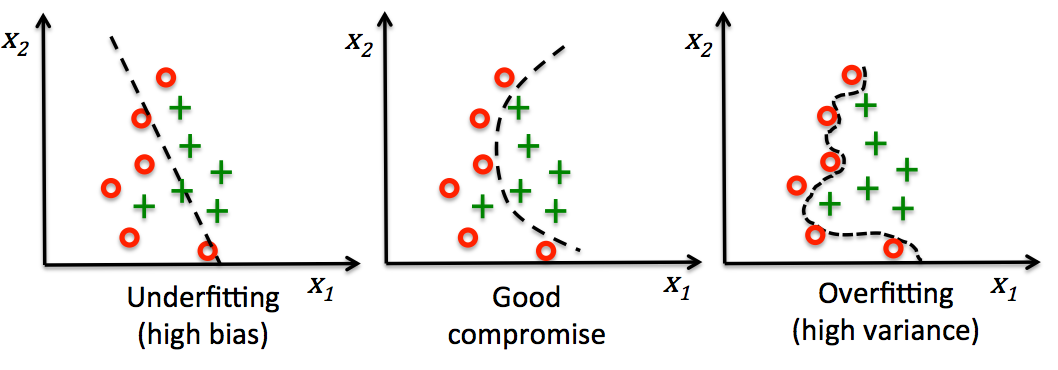

#**Loading common libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

from sklearn import datasets
from sklearn.metrics import mean_squared_error        # Regression metrics
from sklearn.metrics import accuracy_score            # Classification metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import sklearn.neighbors

# **All Functions Definitions**

In [2]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

# **Load datasets**

## Load datasets for classification

In [3]:
# read the train and test dataset
class_train_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/logistic_regression/train.csv')
class_test_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/logistic_regression/test.csv')

# shape of the dataset
print('Shape of classification training data :', class_train_data.shape)
print('Shape of classification testing data :', class_test_data.shape)

Shape of classification training data : (712, 25)
Shape of classification testing data : (179, 25)


Separating the target variable (or column) which we want to predict using ML algorithms

In [4]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
class_train_x = class_train_data.drop(columns=['Survived'],axis=1)
class_train_y = class_train_data['Survived']

# seperate the independent and target variable on testing data
class_test_x = class_test_data.drop(columns=['Survived'],axis=1)
class_test_y = class_test_data['Survived']

class_train = pd.DataFrame(columns=['Train'])
class_train['Train'] = class_train_y

class_test = pd.DataFrame(columns=['Test'])
class_test['Test'] = class_test_y

## Load datasets for Regression

In [5]:
# These datasets are used for following algorithms
# Linear regression

# read the train and test dataset
reg_train_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/train.csv')
reg_test_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/test.csv')

# shape of the dataset
print('\nShape of regression training data :', reg_train_data.shape)
print('\nShape of regression testing data :', reg_test_data.shape)


Shape of regression training data : (1364, 36)

Shape of regression testing data : (341, 36)


Separating the target variable (or column) which we want to predict using ML algorithms

In [6]:
# Now, we need to predict the missing target variable in the test data
# target variable - Item_Outlet_Sales
# seperate the independent and target variable on training data
reg_train_x = reg_train_data.drop(columns=['Item_Outlet_Sales'], axis=1)
reg_train_y = reg_train_data['Item_Outlet_Sales']

# seperate the independent and target variable on training data
reg_test_x = reg_test_data.drop(columns=['Item_Outlet_Sales'], axis=1)
reg_test_y = reg_test_data['Item_Outlet_Sales']

reg_train = pd.DataFrame(columns=['Train'])
reg_train['Train'] = reg_train_y

reg_test = pd.DataFrame(columns=['Test'])
reg_test['Test'] = reg_test_y

In [7]:
## Data frames for saving prediction of different algorithms
col_list = ['KNN']

# Classification predictions for train and test set
class_train_pred = pd.DataFrame(columns = col_list)
class_test_pred = pd.DataFrame(columns = col_list)

# Regression predictions for train and test set
reg_train_pred = pd.DataFrame(columns = col_list)
reg_test_pred = pd.DataFrame(columns = col_list)

# **K-Nearest Neighbours**

In [8]:
dir(sklearn.neighbors)

['BallTree',
 'DistanceMetric',
 'KDTree',
 'KNeighborsClassifier',
 'KNeighborsRegressor',
 'KNeighborsTransformer',
 'KernelDensity',
 'LocalOutlierFactor',
 'NearestCentroid',
 'NearestNeighbors',
 'NeighborhoodComponentsAnalysis',
 'RadiusNeighborsClassifier',
 'RadiusNeighborsRegressor',
 'RadiusNeighborsTransformer',
 'VALID_METRICS',
 'VALID_METRICS_SPARSE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_ball_tree',
 '_base',
 '_classification',
 '_distance_metric',
 '_graph',
 '_kd_tree',
 '_kde',
 '_lof',
 '_nca',
 '_nearest_centroid',
 '_partition_nodes',
 '_regression',
 '_unsupervised',
 'kneighbors_graph',
 'radius_neighbors_graph']

In [9]:
help(sklearn.neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

# **KNN Classification**

In [10]:
'''
Create the object of the K-Nearest Neighbor model
You can also add other parameters and test your code here
Some parameters are : n_neighbors, leaf_size
Documentation of sklearn K-Neighbors Classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
'''

model = KNeighborsClassifier(n_neighbors = 10)  

# fit the model with the training data
model.fit(class_train_x, class_train_y)

# Number of Neighbors used to predict the target
print('\nThe number of neighbors used to predict the target : ',model.n_neighbors)

# predict the target on the train dataset
predict_train = model.predict(class_train_x)
#print('\nTarget on train data',predict_train) 

# Save predictions
class_train_pred['KNN'] = predict_train

# Accuray Score on train dataset
accuracy_train = accuracy_score(class_train_y, predict_train)
print('\nAccuracy for KNN on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(class_test_x)
#print('Target on test data',predict_test)

# Save predictions
class_test_pred['KNN'] = predict_test

# Accuracy Score on test dataset
accuracy_test = accuracy_score(class_test_y, predict_test)
print('\nAccuracy for KNN on test dataset : ', accuracy_test)


The number of neighbors used to predict the target :  10

Accuracy for KNN on train dataset :  0.7457865168539326

Accuracy for KNN on test dataset :  0.7486033519553073


# **KNN Regression**

In [11]:
'''
Create the object of the K-Nearest Neighbor model
You can also add other parameters and test your code here
Some parameters are : n_neighbors, leaf_size
Documentation of sklearn K-Neighbors Classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
'''

model = KNeighborsRegressor()  

# fit the model with the training data
model.fit(reg_train_x, reg_train_y)

# Number of Neighbors used to predict the target
print('\nThe number of neighbors used to predict the target : ',model.n_neighbors)

# predict the target on the train dataset
predict_train = model.predict(reg_train_x)
#print('\nTarget on train data',predict_train) 

# Save predictions
reg_train_pred['KNN'] = predict_train

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(reg_train_y, predict_train)**(0.5)
print('\nRMSE for KNN on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = model.predict(reg_test_x)

# Save predictions
reg_test_pred['KNN'] = predict_test

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(reg_test_y, predict_test)**(0.5)
print('\nRMSE for KNN on test dataset : ', rmse_test)


The number of neighbors used to predict the target :  5

RMSE for KNN on train dataset :  1178.3921510930506

RMSE for KNN on test dataset :  1197.7985934287713


In [12]:
class_train_pred.head() 

,KNN
0,0
1,1
2,0
3,0
4,0


In [13]:
class_test_pred.head()

,KNN
0,0
1,0
2,0
3,1
4,1


In [14]:
reg_train_pred.head()

,KNN
0,802.42216
1,1947.59816
2,2674.38544
3,852.09084
4,2715.79820


In [15]:
reg_test_pred.head()

,KNN
0,1010.28492
1,2511.66392
2,2628.44524
3,2704.21328
4,3158.42204


In [16]:
# Save original data
class_train.to_csv('class_train.csv', sep='\t', index=False)

class_test.to_csv('class_test.csv', sep='\t', index=False)

reg_train.to_csv('reg_train.csv', sep='\t', index=False)

reg_test.to_csv('reg_test.csv', sep='\t', index=False)

In [17]:
#Export predictions to csv, delimit by tab

class_train_pred.to_csv('class_train_pred.csv', sep='\t', index=False)

class_test_pred.to_csv('class_test_pred.csv', sep='\t', index=False)

reg_train_pred.to_csv('reg_train_pred.csv', sep='\t', index=False)

reg_test_pred.to_csv('reg_test_pred.csv', sep='\t', index=False)

#**Another Experiment with Iris Dataset**

In [18]:
iris = datasets.load_iris()
data = iris.data[:, [2, 3]]
labels = iris.target

print('Class labels:', np.unique(labels))

Class labels: [0 1 2]




Now let's split data into 70% training and 30% test data:


In [19]:
data.shape

(150, 2)

In [20]:
labels.shape

(150,)

In [21]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size=0.3, random_state=0)

# **Feature Scaling**

There are Datasets that have multiple features with varying degrees of magnitude, range, and units. This is a significant obstacle as a few machine learning algorithms are highly sensitive to these features. As in many tasks of Machine Learning, also **Feature Scaling**  improves (significantly) the performance of some machine learning algorithms and does not work at all for others.

For **Gradient Descent Algorithms** the presence of feature value X in the formula will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale can help the gradient descent converge more quickly towards the minima.


For **Distance-Based algorithms** like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity. However, **Feature Scaling** brings both the features into the picture and the distances are now more comparable than they were before we applied scaling.

Normalization vs. standardization is an eternal question among machine learning newcomers: 
1) Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like Neural Networks.
2) Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization. In the end, There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.


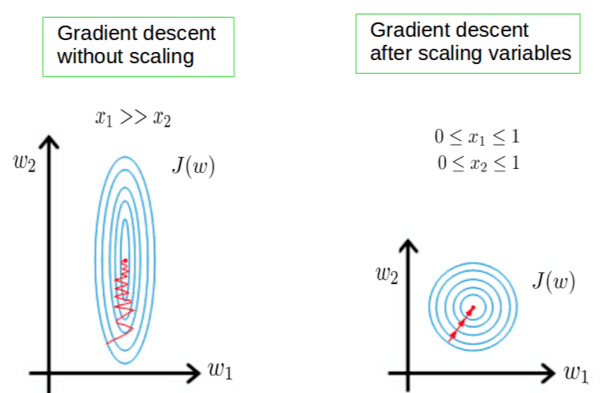

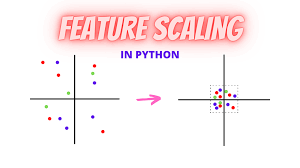

Standardizing the features:

In [22]:
sc = StandardScaler()  
sc.fit(train_x)                        # fit scaler on training data
train_x_std = sc.transform(train_x)    # transform training data
test_x_std = sc.transform(test_x)      # transform testing data

Normalizing the features: 

In [23]:
norm = MinMaxScaler()
norm.fit(train_x)                       # fit scaler on training data
train_x_norm = norm.transform(train_x)  # transform training data
test_x_norm = norm.transform(test_x)    # transform testing data

In [24]:
train_x.shape

(105, 2)

In [25]:
train_y.shape

(105,)

In [26]:
test_x.shape

(45, 2)

In [27]:
test_y.shape

(45,)

Misclassified samples: 0
Accuracy: 1.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

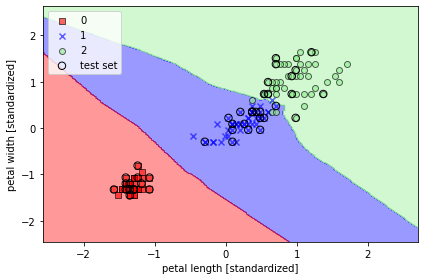

In [29]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(train_x_std, train_y)
pred_y = knn.predict(test_x_std)
print('Misclassified samples: %d' % (test_y != pred_y).sum())
print('Accuracy: %.2f' % accuracy_score(test_y, pred_y))

X_combined_std = np.vstack((train_x_std, test_x_std))
y_combined = np.hstack((train_y, test_y))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier = knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./knn_decision_regions.png', dpi=300)
plt.show()